# NB4. Models of Networks

## A. Models of Networks.

Consider the following [Graph Generators](https://networkx.github.io/documentation/stable/reference/generators.html):

**Random Network Model**: The function ```erdos_renyi_graph(n,p)``` returns a $G_n,p$ random graph with the following parameters:
* n - The number of nodes.
* p - Probability fo edge creation.

**Small World Model** : The function ```watts_strogatz_graph(n,k,p)``` returns a small-world graph with the following parameters:
* n - The number of nodes.
* k - Each node is joined with its k nearest neighbors in a ring topology.
* p - The probability of rewiring each edge.

### Task 1

Simulate different networks using the Erdos-Renyi Model considering the following parameters:

(a) N = 100, p = 0.20

(b) N = 100, p = 0.40

(c) N = 100, p = 0.60

(d) N = 100, p = 0.80

For each network plot its degree distribution. Additionally, make a comparative table including:
* Number of links.
* Expected number of links using the equation:
$$ \langle L \rangle = p \frac{N(N-1)}{2}$$
* Average degree.
* Expected average degrees using the equation:
$$\langle k \rangle = p(N-1)$$
* Density.
* Expected density using the equation:
$$\langle d \rangle = p$$
* Average Shortest Path.
* Expected Average Shortest Path using the equation:
$$\langle l \rangle \approx \frac{ln(N)}{ln(\langle k \rangle)}$$

In [4]:
# Import necessary libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

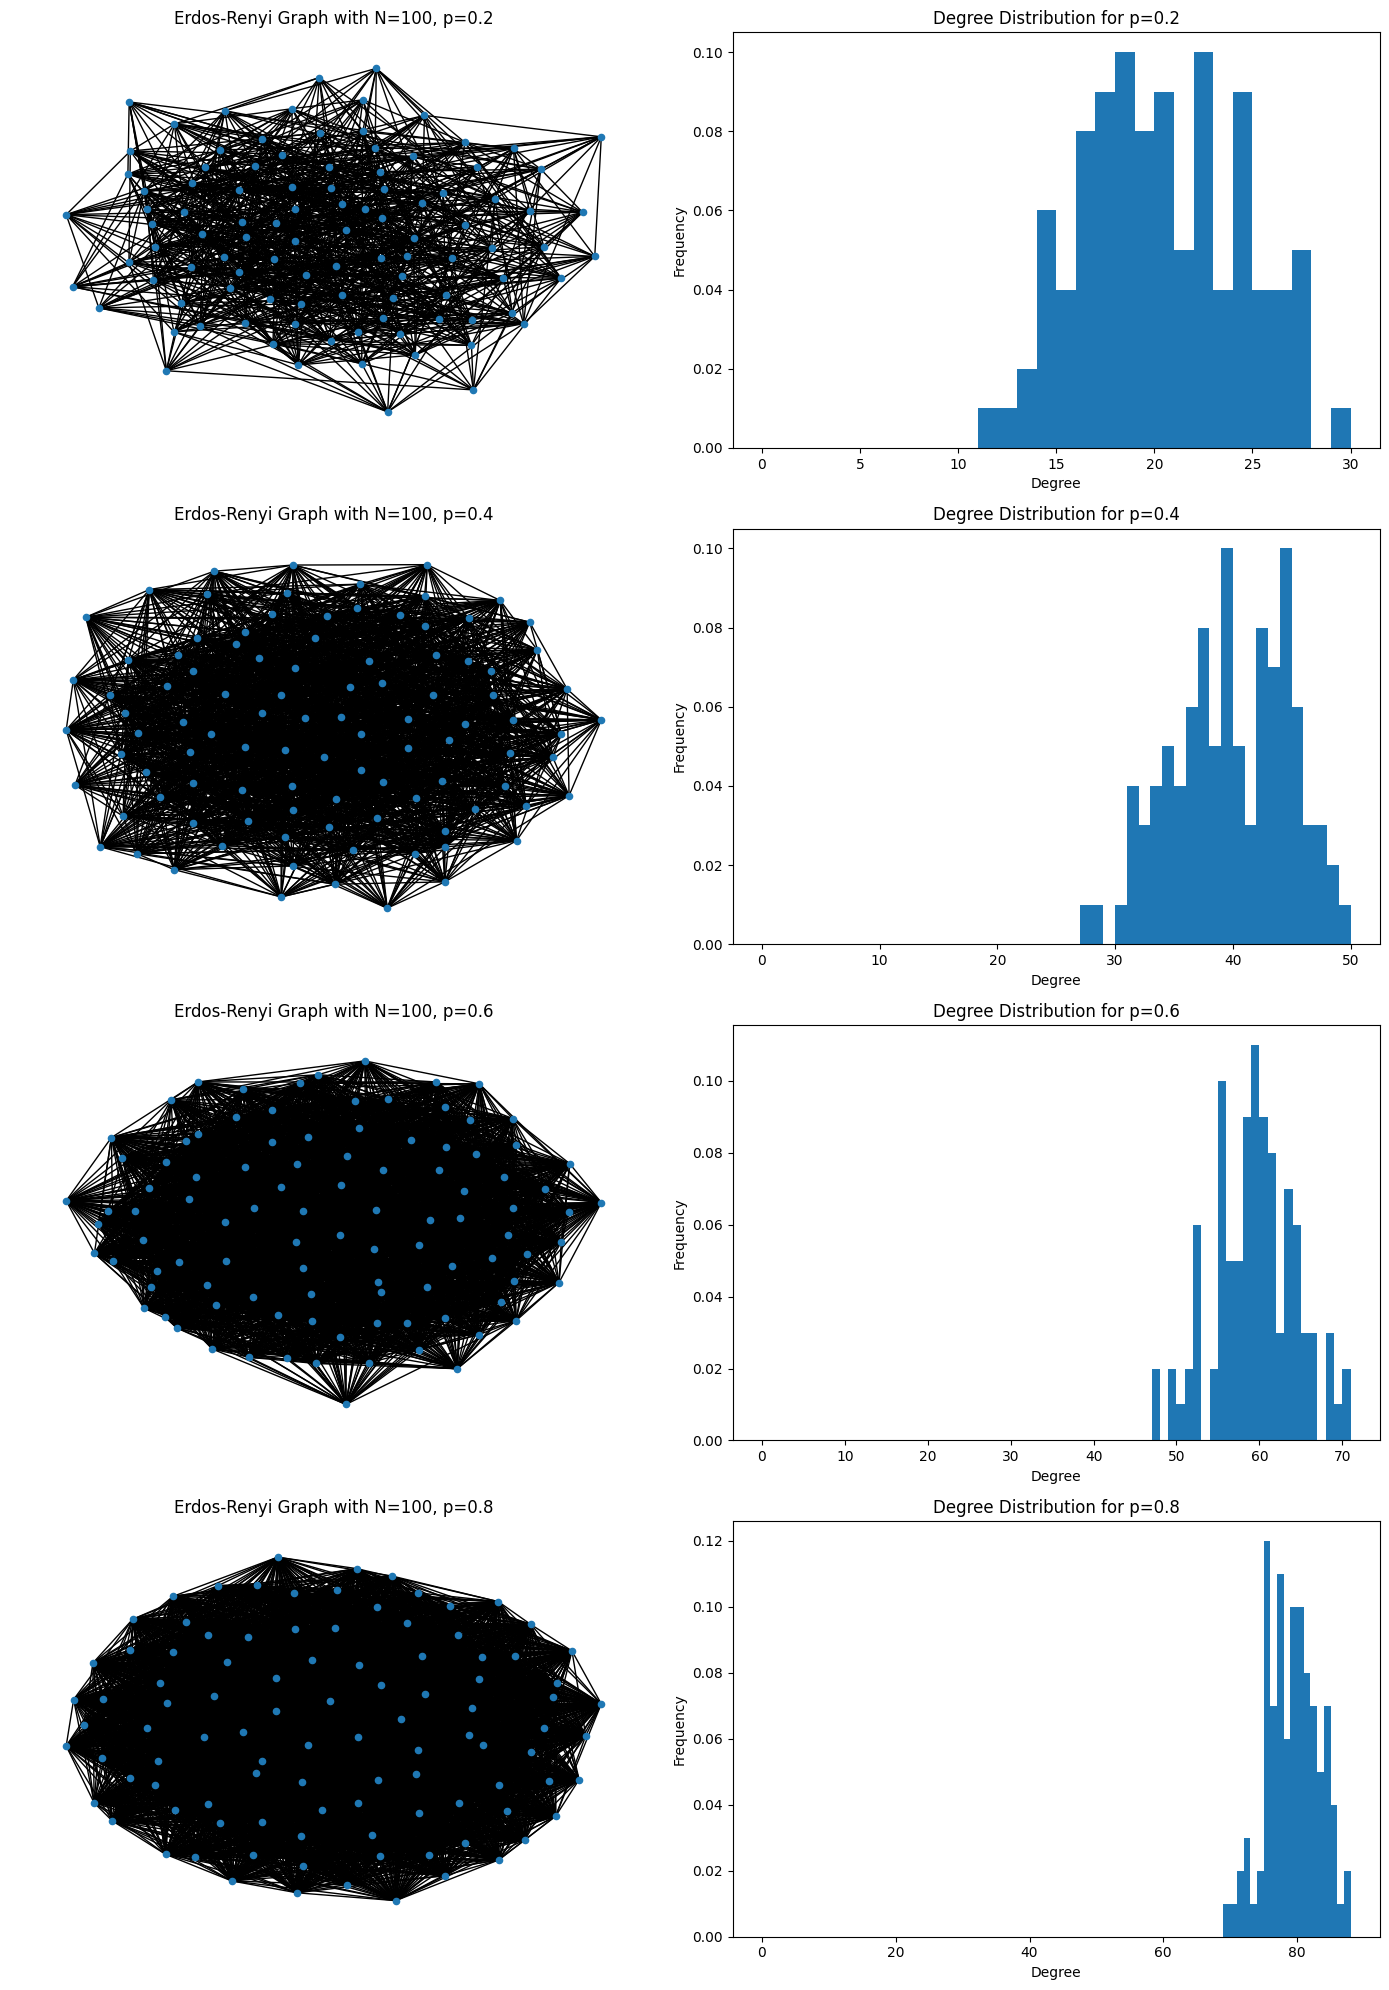

In [5]:
# Parameters for the networks
params = [
  {"N": 100, "p": 0.20},  # Network A
  {"N": 100, "p": 0.40},  # Network B
  {"N": 100, "p": 0.60},  # Network C
  {"N": 100, "p": 0.80}   # Network D
]

# Generating network A
Ga = nx.erdos_renyi_graph(params[0]["N"], params[0]["p"])

# Generating network B
Gb = nx.erdos_renyi_graph(params[1]["N"], params[1]["p"])

# Generating network C
Gc = nx.erdos_renyi_graph(params[2]["N"], params[2]["p"])

# Generating network D
Gd = nx.erdos_renyi_graph(params[3]["N"], params[3]["p"])

# List to store each graph
graphs = [Ga, Gb, Gc, Gd]

# Plotting each graph with their degree distributions
fig, axs = plt.subplots(4, 2, figsize=(14, 20))

# Loop through each parameter set and plot the graph and degree distribution
for i, param in enumerate(params):
  # Plot the network graph
  nx.draw(graphs[i], ax=axs[i, 0], node_size=20, with_labels=False)
  axs[i, 0].set_title(f'Erdos-Renyi Graph with N=100, p={param["p"]}')

  # Plot the degree distribution
  degree_sequence = sorted((d for n, d in graphs[i].degree()), reverse=True)
  axs[i, 1].hist(degree_sequence, bins=range(max(degree_sequence)+1), density=True)
  axs[i, 1].set_title(f'Degree Distribution for p={param["p"]}')
  axs[i, 1].set_xlabel('Degree')
  axs[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
# Function to calculate stats of each graph
def calculate_stats(G, N, p):
  '''
  Calculate actual and expected stats for a given graph.

  Parameters:
  - G (networkx.Graph): The graph for which to calculate stats.
  - N (int): The number of nodes in the graph.
  - p (float): The probability of edge creation in the Erdos-Renyu random graph
    model.

  Returns:
  - tuple: A tuple containing the following stats:
    - L (int): The number of links in the graph.
    - L_exp (float): The expected number of links.
    - k_avg (float): The average degree of the graph.
    - k_exp (float): The expected average degree.
    - density (float): The density of the graph.
    - d_exp (float): The expected density of the graph.
    - l_avg (float): The average shortest path length of the graph.
    - l_exp (float): The expected average shortest path length
  '''
  # Calculate actual values
  L = G.number_of_edges()
  k_avg = sum(dict(G.degree()).values()) / G.number_of_nodes()
  density = nx.density(G)
  if nx.is_connected(G):
    l_avg = nx.average_shortest_path_length(G)
  else:
    l_avg = float('inf')  # if not connected, path length is infinite

  # Expected values
  L_exp = p * N * (N - 1) / 2
  k_exp = p * (N - 1)
  d_exp = p
  if k_exp > 1:
    l_exp = np.log(N) / np.log(k_exp)
  else:
    l_exp = float('inf') # if not connected, path length is infinite

  return L, L_exp, k_avg, k_exp, density, d_exp, l_avg, l_exp

# List to store the results
results = []

for i, param in enumerate(params):
  L, L_exp, k_avg, k_exp, density, d_exp, l_avg, l_exp = calculate_stats(graphs[i], params[i]["N"], params[i]["p"])
  results.append({
      "p": param["p"],
      "Number of Links (L)": L,
      "Expected Number of Links (⟨L⟩)": L_exp,
      "Average Degree (k)": k_avg,
      "Expected Average Degree (⟨k⟩)": k_exp,
      "Density": density,
      "Expected Density (⟨d⟩)": d_exp,
      "Average Shortest Path (l)": l_avg,
      "Expected Average Shortest Path (⟨l⟩)": l_exp
    })


# Create DataFrame for comparative table
com_table = pd.DataFrame(results)
com_table

,p,Number of Links (L),Expected Number of Links (⟨L⟩),Average Degree (k),Expected Average Degree (⟨k⟩),Density,Expected Density (⟨d⟩),Average Shortest Path (l),Expected Average Shortest Path (⟨l⟩)
0,0.2,994,990.0,19.88,19.8,0.200808,0.2,1.809697,1.542418
1,0.4,1967,1980.0,39.34,39.6,0.397374,0.4,1.602626,1.251803
2,0.6,2948,2970.0,58.96,59.4,0.595556,0.6,1.404444,1.127531
3,0.8,3941,3960.0,78.82,79.2,0.796162,0.8,1.203838,1.053338


### Task 2

Consider a the simulation of different random network with a fixed value of the number of nodes but different values of link probability. Naturally, at the beginig at p = 0, the system is totally fragmented into singletons. An increasing number of pairs of nodes will get connected, and through them connected subnetworks will be formed as the link probability increases.

Erdos and Renyi discovered a transition point from configurations in which all subnetworks are relatively small, to a configuration where at least one of the subnetworks contains almost all the nodes. This transition can be observe in Fig. 1.

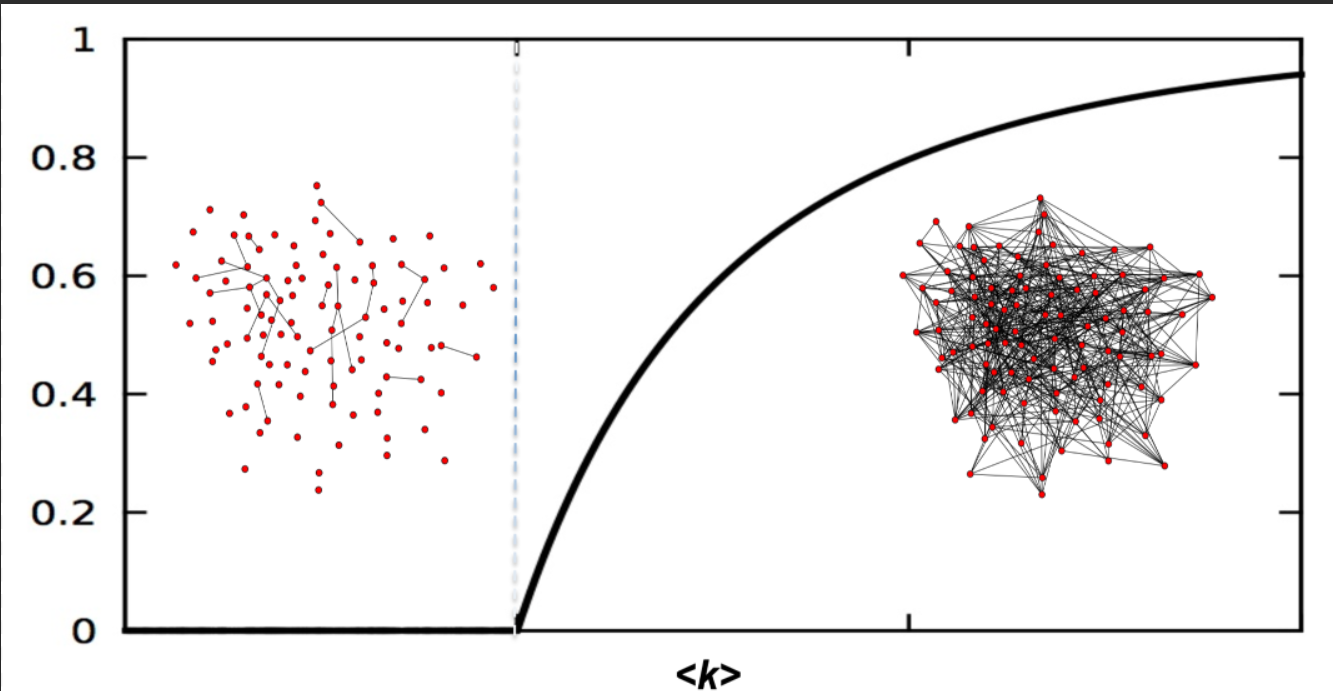

<center> Fig. 1</center>

Don't forget that the probability and the expected degree $\langle k \rangle$  follow the relation:

$$ \langle L \rangle = p \frac{N(N-1)}{2}$$

Fig. 1 is an sketch of the evoluation. Reproduce a similar plot for networks with 1000 nodes. Use 25 equally spaced values of the link probability, in the interval [0, 0.005]. For each value, generate 20 different networks, compute the relative size of the giant component.

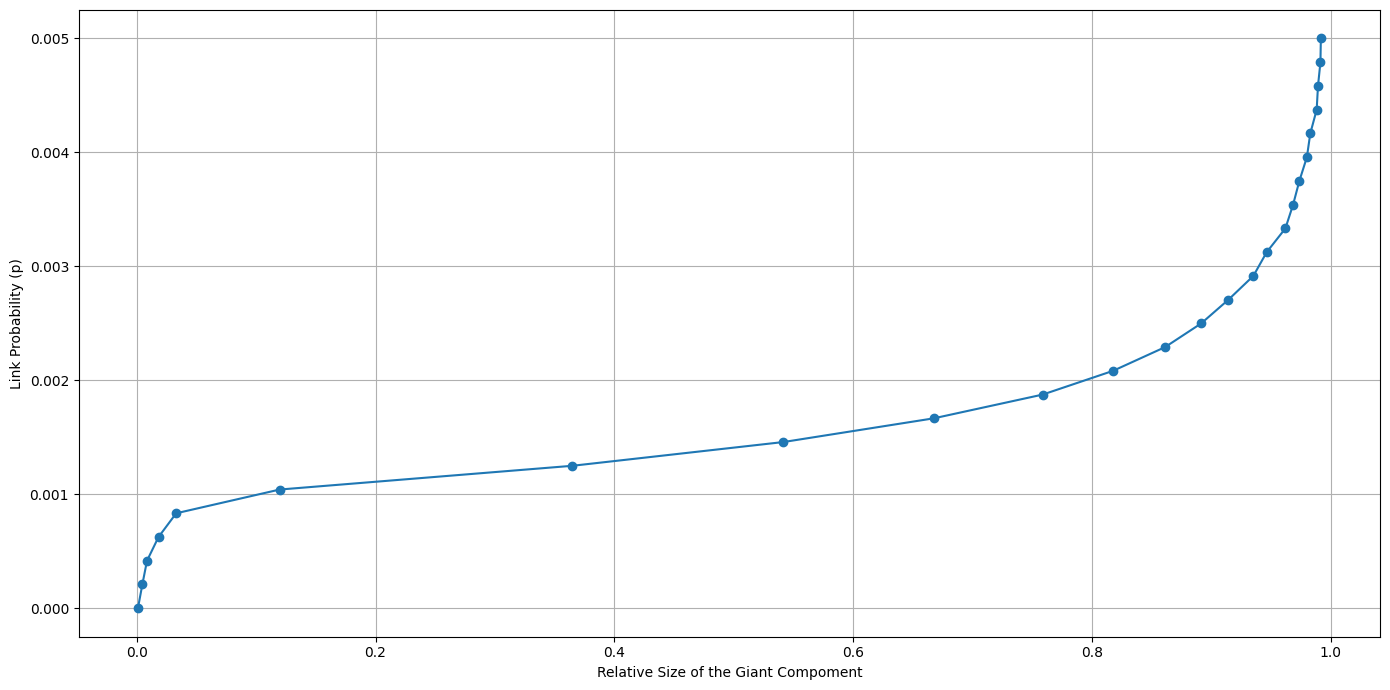

In [10]:
# Function to calculate the relative size of the giant component
def giant_component_relative_size(G):
  '''
  Calculate the relative size of the giant component in a graph.

  Parameters:
  - G (networkx.Graph): The input graph.

  Returns:
  - float: The relative size of the giant component.
  '''
  # Find largest connected component in the graph
  largest_cc = max(nx.connected_components(G), key=len)
  # Calculate the relative size of the largest connected component
  return len(largest_cc) / G.number_of_nodes()

# Parameters
N = 1000
p_values = np.linspace(0, 0.005, 25)
num_networks = 20

# Collecting the relative sizes of the giant component
giant_component_sizes = []

for p in p_values:
  sizes = []
  for _ in range(num_networks):
    G = nx.erdos_renyi_graph(N, p)
    sizes.append(giant_component_relative_size(G))
  giant_component_sizes.append(np.mean(sizes))

# Plotting the results
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(giant_component_sizes, p_values, marker='o')
ax.set_xlabel('Relative Size of the Giant Compoment')
ax.set_ylabel('Link Probability (p)')
ax.grid(True)

plt.tight_layout()
plt.show()

### Task 3
In the Watts-Strogratz Model, there is range of rewiring probability values between p = 0.01 and p = 0.1 in the average shortest-path length is close to that of an equivalent random network; and at the same time, the clustering coefficient from the model is high. Nevertheless, the model cannot generate hubs. Fig. 2 presents the average path length and the clustering coefficient as a function of the rewiring probability. Observe that the x-axis is in a logarithmic scale.


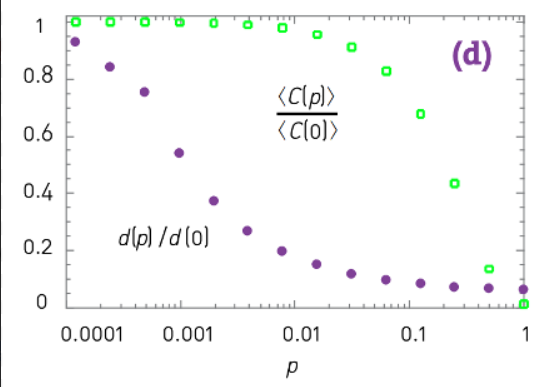

<center> Fig. 2</center>


Reproduce a similar plot, by calculating:
* the average shortest path ($\langle l \rangle$)
* and the average clustering coefficient ($C$)

for Watts–Strogatz networks constructed for different values of the rewiring probability p. Take 20 equally spaced values of p between 0 and 1. For each value of p, build 20 different networks and compute the average shortest path and average clustering coefficient. To plot the two curves on a common y-axis, you can normalize the values by dividing them by the corresponding values for the probability p = 0.

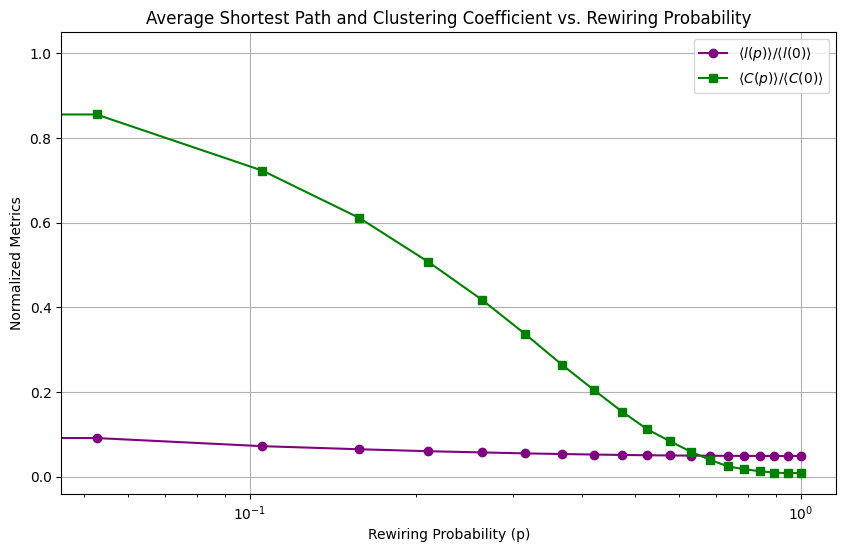

In [ ]:
# Function to calculate average shortest path length and average clustering coefficient
def calculate_metrics(G):
  '''
  Calculate the average shortest path length and average clustering coefficient
  for a given network.

  Parameters:
  - G (networkx.Graph): The graph for which to calculate metrics

  Returns:
  - tuple: A tuple containing the following metrics:
    - avg_shortest_path (float): Average shortest path length
    - avg_clustering_coeff (float): Average clustering coefficient
  '''
  # Check if the graph is connected
  if nx.is_connected(G):
    # Calculate the average shortest path
    avg_shortest_path = nx.average_shortest_path_length(G)
  else:
    # Infinite if not connected
    avg_shortest_path = float('inf')
  # Calculate the average clustering coefficient
  avg_clustering_coeff = nx.average_clustering(G)
  # Return the metrcis
  return avg_shortest_path, avg_clustering_coeff

# Parameters
N = 1000
k = 6  # Each node is connected to k nearest neighbors in ring topology
p_values = np.linspace(0, 1, 20)
num_networks = 20

# Collecting the average shortest path lengths and clustering coefficients
avg_shortest_paths = []
avg_clustering_coeffs = []

for p in p_values:
  shortest_paths = []
  clustering_coeffs = []
  for _ in range(num_networks):
    G = nx.watts_strogatz_graph(N, k, p)
    avg_shortest_path, avg_clustering_coeff = calculate_metrics(G)
    shortest_paths.append(avg_shortest_path)
    clustering_coeffs.append(avg_clustering_coeff)
  avg_shortest_paths.append(np.mean(shortest_paths))
  avg_clustering_coeffs.append(np.mean(clustering_coeffs))

# Normalizing the values by the corresponding values for p = 0
l_0 = avg_shortest_paths[0]
C_0 = avg_clustering_coeffs[0]

normalized_shortest_paths = [l / l_0 for l in avg_shortest_paths]
normalized_clustering_coeffs = [C / C_0 for C in avg_clustering_coeffs]

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(p_values, normalized_shortest_paths, 'o-', label='$\\langle l(p) \\rangle / \\langle l(0) \\rangle$', color='purple')
ax.plot(p_values, normalized_clustering_coeffs, 's-', label='$\\langle C(p) \\rangle / \\langle C(0) \\rangle$', color='green')
ax.set_xlabel('Rewiring Probability (p)')
ax.set_ylabel('Normalized Metrics')
ax.set_xscale('log')
ax.legend()
ax.grid(True)

plt.title('Average Shortest Path and Clustering Coefficient vs. Rewiring Probability')
plt.show()

## B. Identification of Network Models [40 pts]

### Task 4
Analyze each of the 4 Networks and determine which of the three models was used to generate them:
* model1.csv
* model2.csv
* model3.csv
* model4.csv

Justify your selection in each case.

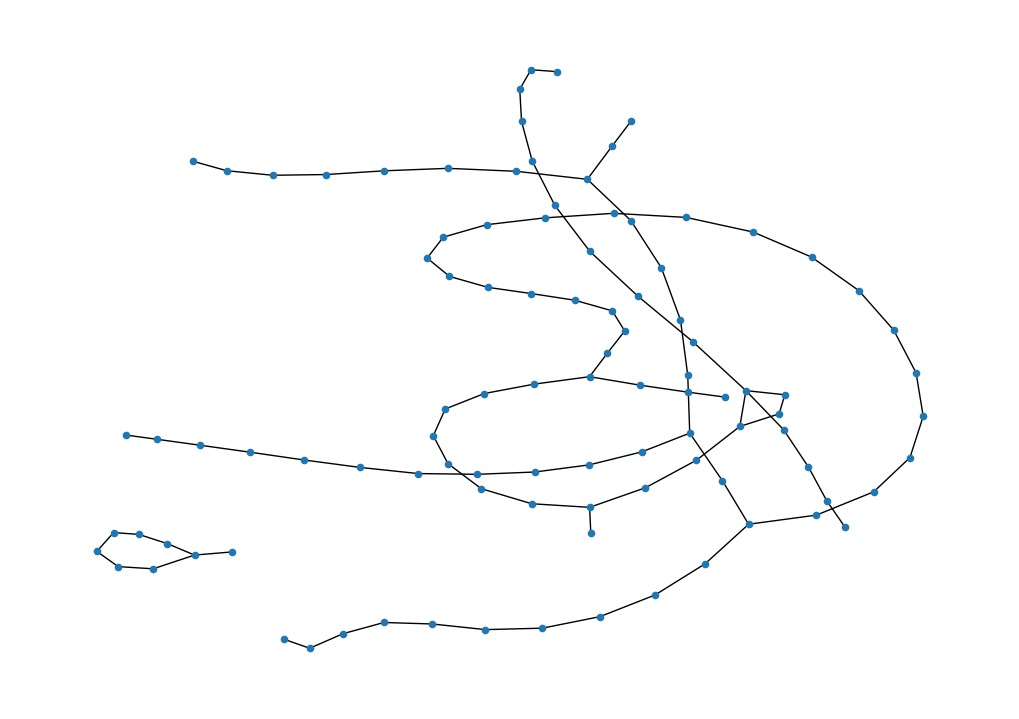

In [ ]:
# Analysis of model1.csv (10 pts)

# Load the network data
file_path = '/content/model1.csv'  # Replace with the actual path to the CSV file
adj_matrix = pd.read_csv(file_path, header=None)

# Convert the adjacency matrix to a NetworkX graph
G1 = nx.from_numpy_array(adj_matrix.values)

# Plot the network
plt.figure(figsize=(10, 7))
nx.draw(G1, node_size=20)
plt.show()

In [ ]:
# Calculate average shortest path length
if nx.is_connected(G1):
  avg_shortest_path = nx.average_shortest_path_length(G1)
else:
  avg_shortest_path = float('inf')
print(f'Average Shortest Path Length: {avg_shortest_path}')

Average Shortest Path Length: inf


In [ ]:
# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(G1)
print(f'Average Clustering Coefficient: {avg_clustering_coeff}')

Average Clustering Coefficient: 0.0


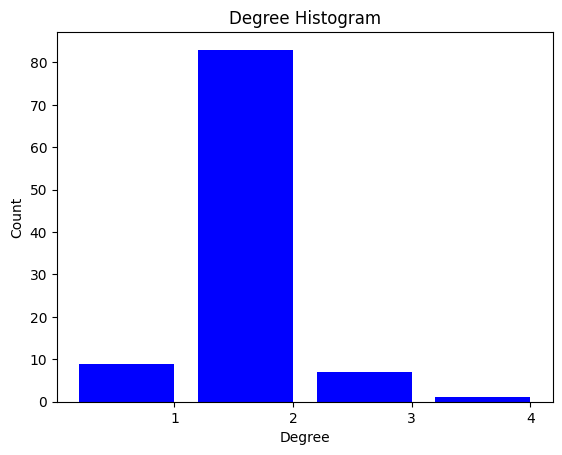

In [ ]:
# Analyze degree distribution
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

Based on the results of the analyis, the network is most likely a random network model with low connection probability, this was observed due to the disconnected components and low clustering coefficient. This results in a network with many small, disconnected components and no significant clustering.

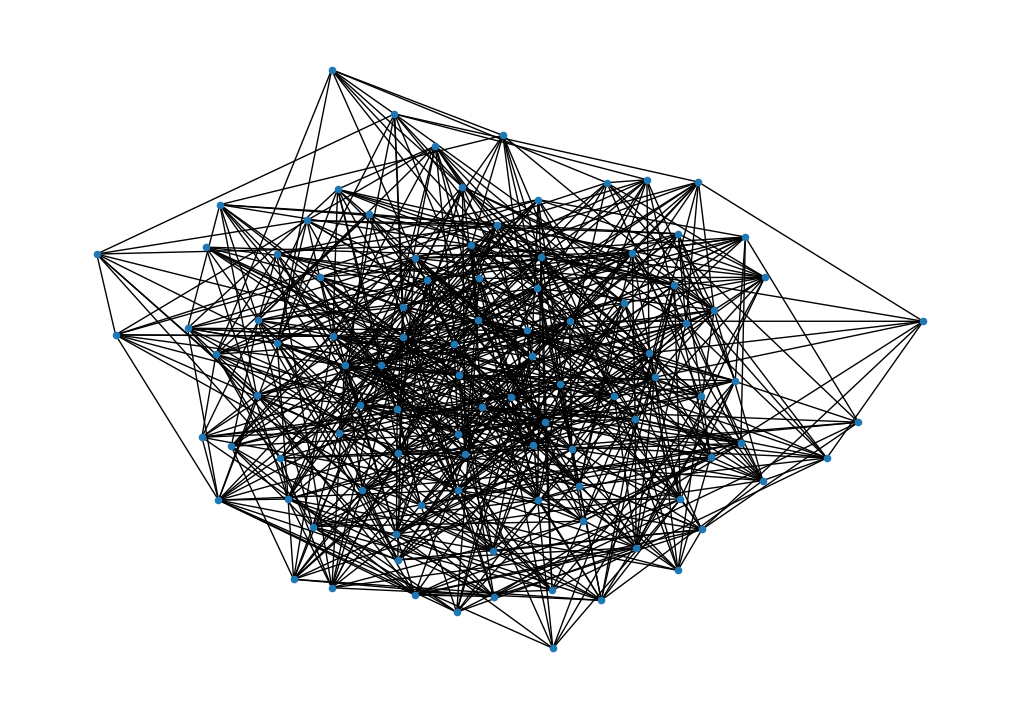

In [ ]:
# Analysis of model2.csv (10 pts)
# Load the network data
file_path = '/content/model2.csv'  # Replace with the actual path to the CSV file
adj_matrix = pd.read_csv(file_path, header=None)

# Convert the adjacency matrix to a NetworkX graph
G2 = nx.from_numpy_array(adj_matrix.values)

# Plot the network
plt.figure(figsize=(10, 7))
nx.draw(G2, node_size=20)
plt.show()

In [ ]:
# Calculate average shortest path length
if nx.is_connected(G2):
  avg_shortest_path = nx.average_shortest_path_length(G2)
else:
  avg_shortest_path = float('inf')
print(f'Average Shortest Path Length: {avg_shortest_path}')

Average Shortest Path Length: 1.938989898989899


In [ ]:
# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(G2)
print(f'Average Clustering Coefficient: {avg_clustering_coeff}')

Average Clustering Coefficient: 0.15027146377873918


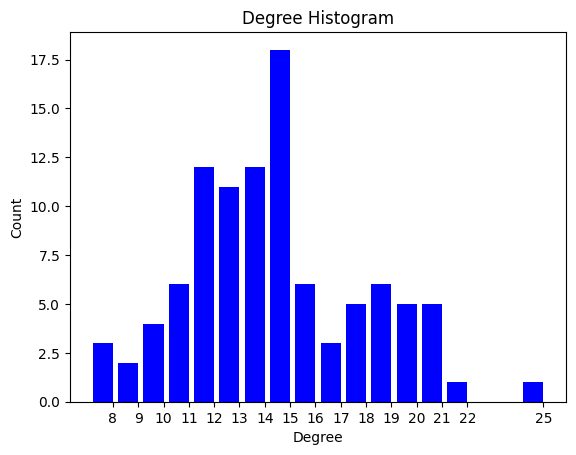

In [ ]:
# Analyze degree distribution
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticklabels(deg)

plt.show()

Based on the results of this analysis the network is most likely a small world model, this can be concluded thanks to the average path length of 1.94 and the average clustering coefficient of 0.15. Also, the distribution has a bell shape typical of this model.

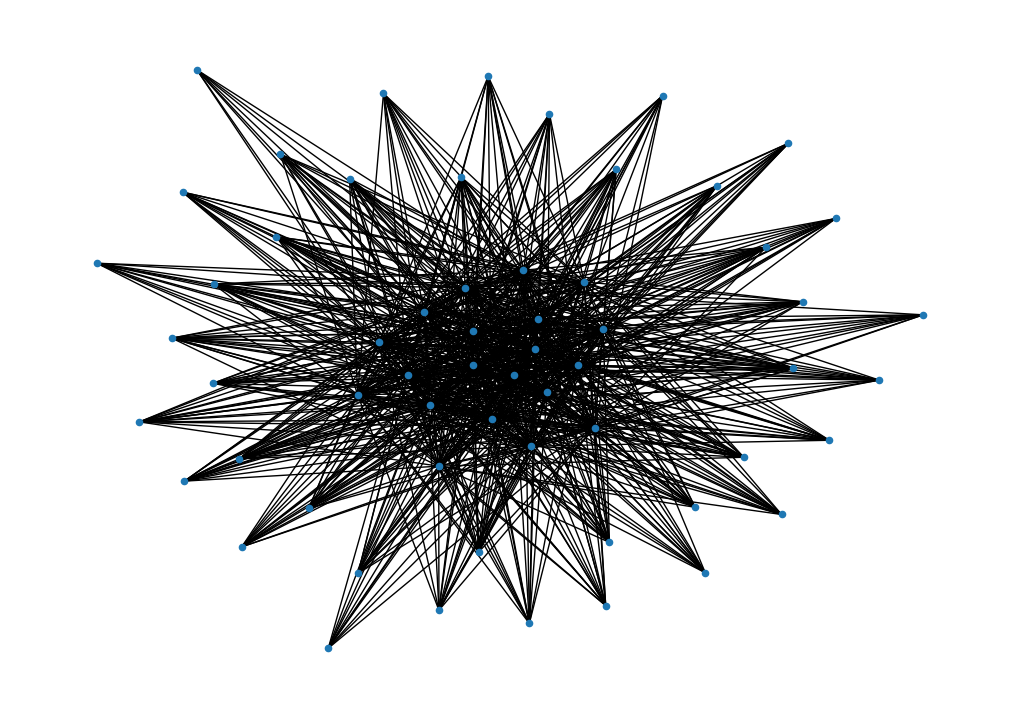

In [ ]:
# Analysis of model3.csv (10 pts)
# Load the network data
file_path = '/content/model3.csv'  # Replace with the actual path to the CSV file
adj_matrix = pd.read_csv(file_path, header=None)

# Convert the adjacency matrix to a NetworkX graph
G3 = nx.from_numpy_array(adj_matrix.values)

# Plot the network
plt.figure(figsize=(10, 7))
nx.draw(G3, node_size=20)
plt.show()

In [ ]:
# Calculate average shortest path length
if nx.is_connected(G3):
  avg_shortest_path = nx.average_shortest_path_length(G3)
else:
  avg_shortest_path = float('inf')
print(f'Average Shortest Path Length: {avg_shortest_path}')

Average Shortest Path Length: 1.5480225988700564


In [ ]:
# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(G3)
print(f'Average Clustering Coefficient: {avg_clustering_coeff}')

Average Clustering Coefficient: 0.8131649686785887


<ipython-input-55-c3adba8298fb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(deg)


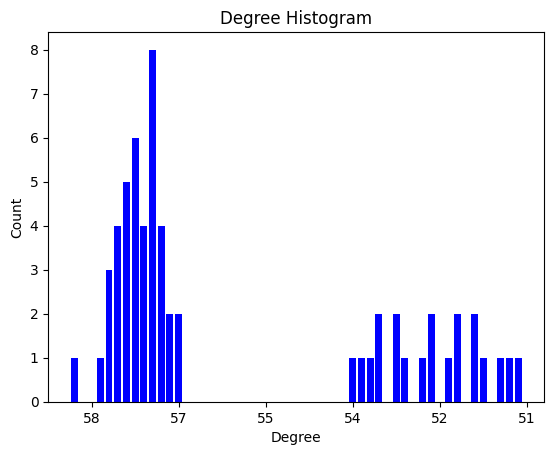

In [ ]:
# Analyze degree distribution
degree_sequence = sorted([d for n, d in G3.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticklabels(deg)

plt.show()

Based on the results, the network shows characteristics typical of a small-world model. The average shortest path length of 1.5480 indicates that any node can be reached from any other node through a relatively short number of steps. Additionally, the high average clustering coefficient of 0.8132 suggests a high degree of local clustering. The degree histogram shows a distribution where most nodes have a similar degree, with a few outliers, which further supports the presence of local clustering.

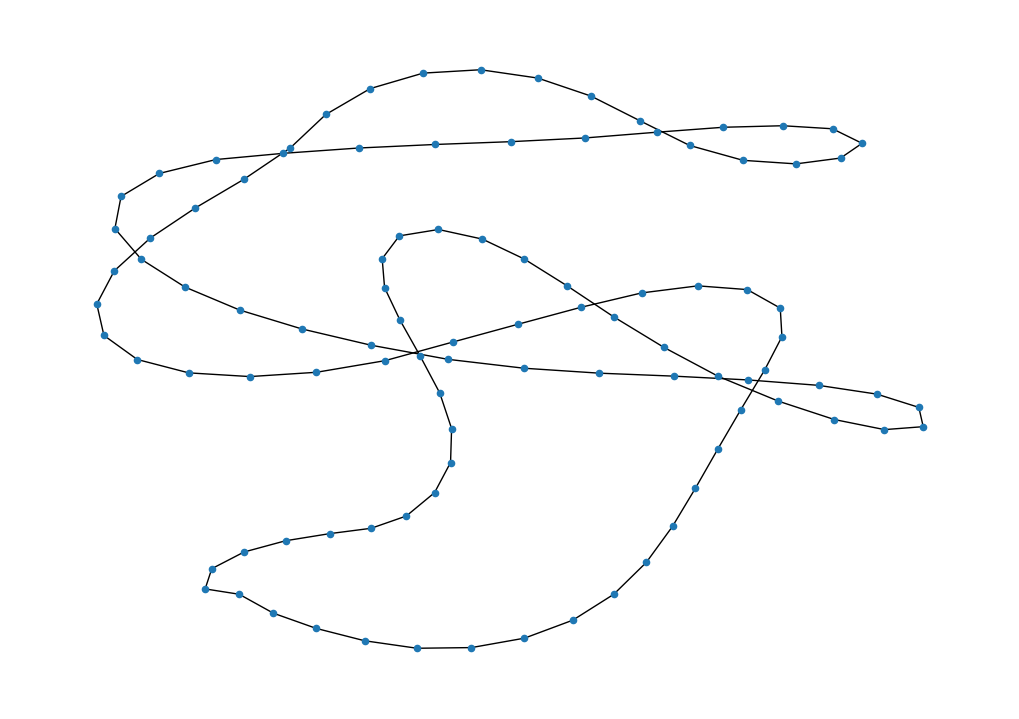

In [ ]:
# Analysis of model4.csv (10 pts)
# Load the network data
file_path = '/content/model4.csv'  # Replace with the actual path to the CSV file
adj_matrix = pd.read_csv(file_path, header=None)

# Convert the adjacency matrix to a NetworkX graph
G4 = nx.from_numpy_array(adj_matrix.values)

# Plot the network
plt.figure(figsize=(10, 7))
nx.draw(G4, node_size=20)
plt.show()

In [ ]:
# Calculate average shortest path length
if nx.is_connected(G4):
  avg_shortest_path = nx.average_shortest_path_length(G4)
else:
  avg_shortest_path = float('inf')
print(f'Average Shortest Path Length: {avg_shortest_path}')

Average Shortest Path Length: 25.252525252525253


In [ ]:
# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(G4)
print(f'Average Clustering Coefficient: {avg_clustering_coeff}')

Average Clustering Coefficient: 0.0


<ipython-input-60-f26602e4b929>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(deg)


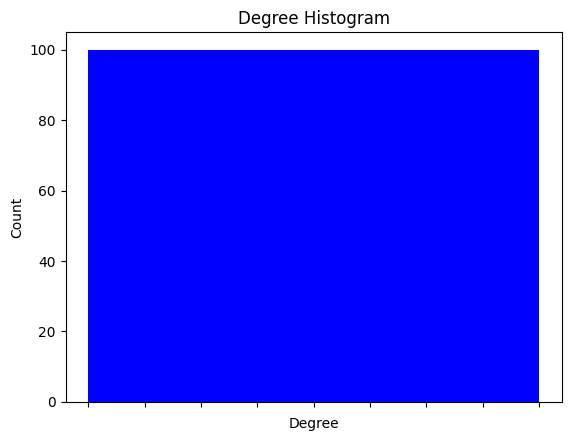

In [ ]:
# Analyze degree distribution
degree_sequence = sorted([d for n, d in G4.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticklabels(deg)

plt.show()

Based on the results, there is no clustering in the network. The degree histogram shows that all nodes have the same degree, which is characteristic of a regular lattice structure. This configuration aligns with the Watts-Strogatz model before any rewiring, which means it is a Lattice network.

## References
[1] F. Mencszer, S. Fortunato, C. A. Davis (2020). A First Course in Network Science.